## Delitos

**1.** Con el parámetro chunksize cargue los datos de 30,000 victimas en carpetas de investigación de la FGJ (*delitos_2023.csv* en Github) y realice lo siguiente:

* Obtenga un Dataframe con la frecuencia de los delitos en orden descendente y un gráfico que ilustre los primeros 15 delitos con más frecuencia. 

* Obtenga un Dataframe con los delitos cometidos por alcaldía y un gráfico que ilustre esto.

* Obtenga un Dataframe con los delitos cometidos por categoría y un gráfico que ilustre esto.

* ¿Cuales son las 5 colonias donde se han registrado más delitos?

* ¿En que hora se registraron más delitos?

* ¿Cuales son las 3 alcaldias que registraron menos delitos?

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print(df.dtypes)

In [46]:
# 1. Cargar los datos con chunksize
chunksize = 30000
delitos = pd.read_csv("delitos_2023.csv", chunksize=chunksize)
df = pd.concat(delitos, ignore_index=True)

**Frecuencia de los delitos en orden descendente y gráfico de los primeros 15 delitos**

In [15]:
# Obtenemos la frecuencia de los delitos.

delito_frec = df['delito'].value_counts()
delito_frec_df = delito_frec.to_frame().reset_index()
delito_frec_df.columns = ['delito', 'frecuencia']
delito_frec_df

,delito,frecuencia
0,VIOLENCIA FAMILIAR,4672
1,FRAUDE,2778
2,AMENAZAS,2359
3,ROBO DE OBJETOS,1755
4,ROBO DE ACCESORIOS DE AUTO,1378
...,...,...
232,ROBO A TRANSEUNTE EN HOTEL CON VIOLENCIA,1
233,PERDIDA DE LA VIDA POR ASFIXIA,1
234,FEMINICIDIO POR GOLPES,1
235,ATAQUES A LA PAZ PUBLICA,1


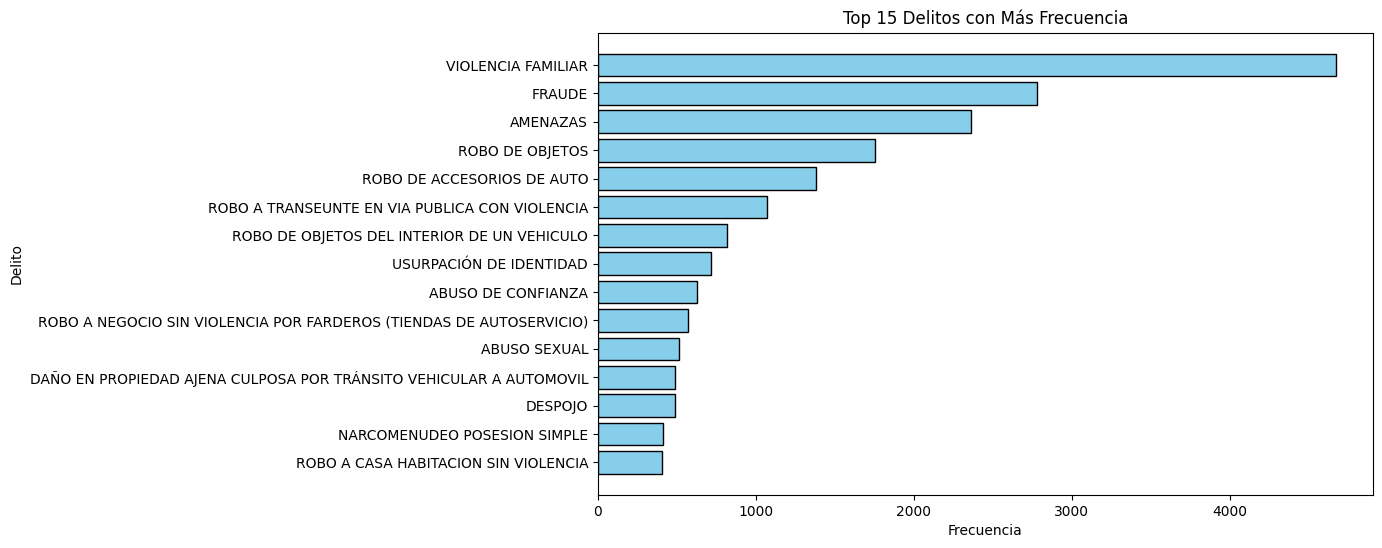

In [17]:
# Gráfico de los primeros 15 delitos

top_15_delitos = delito_frec_df.head(15)
plt.figure(figsize = (10, 6))
plt.barh(top_15_delitos['delito'], top_15_delitos['frecuencia'], color = 'skyblue', edgecolor = 'black')
plt.xlabel('Frecuencia')
plt.ylabel('Delito')
plt.title('Top 15 Delitos con Más Frecuencia')
plt.gca().invert_yaxis()
plt.show()

**Dataframe con los delitos cometidos por alcaldía y un gráfico que ilustre esto.**

In [29]:
# Obtenemos la frecuencia de delitos por alcaldia

delitos_alcaldia = df['alcaldia_hecho'].value_counts() 
delitos_alcaldia_df = delitos_alcaldia.to_frame().reset_index()
delitos_alcaldia_df.columns = ['alcaldia', 'frecuencia']
delitos_alcaldia_df

,alcaldia,frecuencia
0,IZTAPALAPA,4150
1,CUAUHTEMOC,3928
2,GUSTAVO A. MADERO,2973
3,BENITO JUAREZ,2150
4,COYOACAN,2112
5,ALVARO OBREGON,2048
6,VENUSTIANO CARRANZA,1738
7,TLALPAN,1735
8,MIGUEL HIDALGO,1670
9,AZCAPOTZALCO,1427


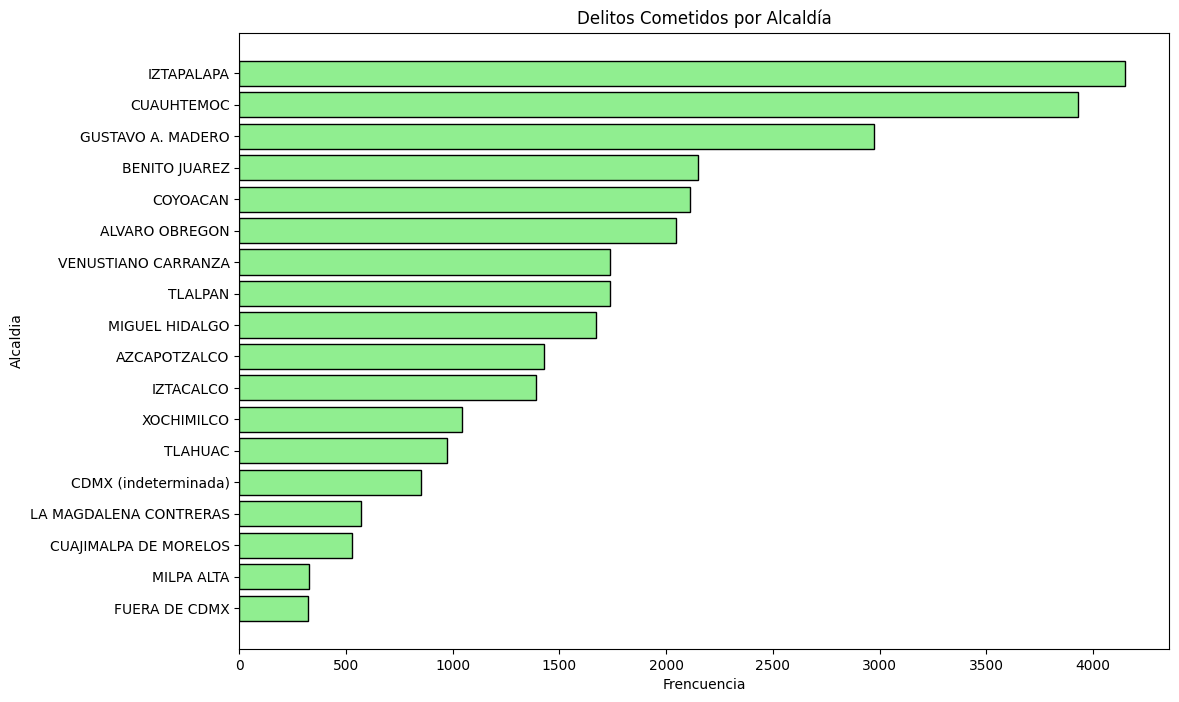

In [31]:
# Gráfico de delitos por alcaldía

plt.figure(figsize = (12,8))
plt.barh(delitos_alcaldia_df['alcaldia'], delitos_alcaldia_df['frecuencia'], color = 'lightgreen', edgecolor = 'black')
plt.xlabel('Frencuencia')
plt.ylabel('Alcaldia')
plt.title('Delitos Cometidos por Alcaldía')
plt.gca().invert_yaxis()
plt.show()

**Obtenga un Dataframe con los delitos cometidos por categoría y un gráfico que ilustre esto.**

In [34]:
# Obtenemos la frecuencia de delitos por categoría

delitos_categoria = df['categoria'].value_counts() 
delitos_categoria_df = delitos_alcaldia.to_frame().reset_index()
delitos_categoria_df.columns = ['categoria', 'frecuencia']
delitos_categoria_df

,categoria,frecuencia
0,DELITO DE BAJO IMPACTO,26041
1,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,1329
2,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,765
3,HECHO NO DELICTIVO,497
4,VIOLACIÓN,330
5,ROBO A NEGOCIO CON VIOLENCIA,240
6,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,201
7,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,143
8,HOMICIDIO DOLOSO,138
9,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN ...,126


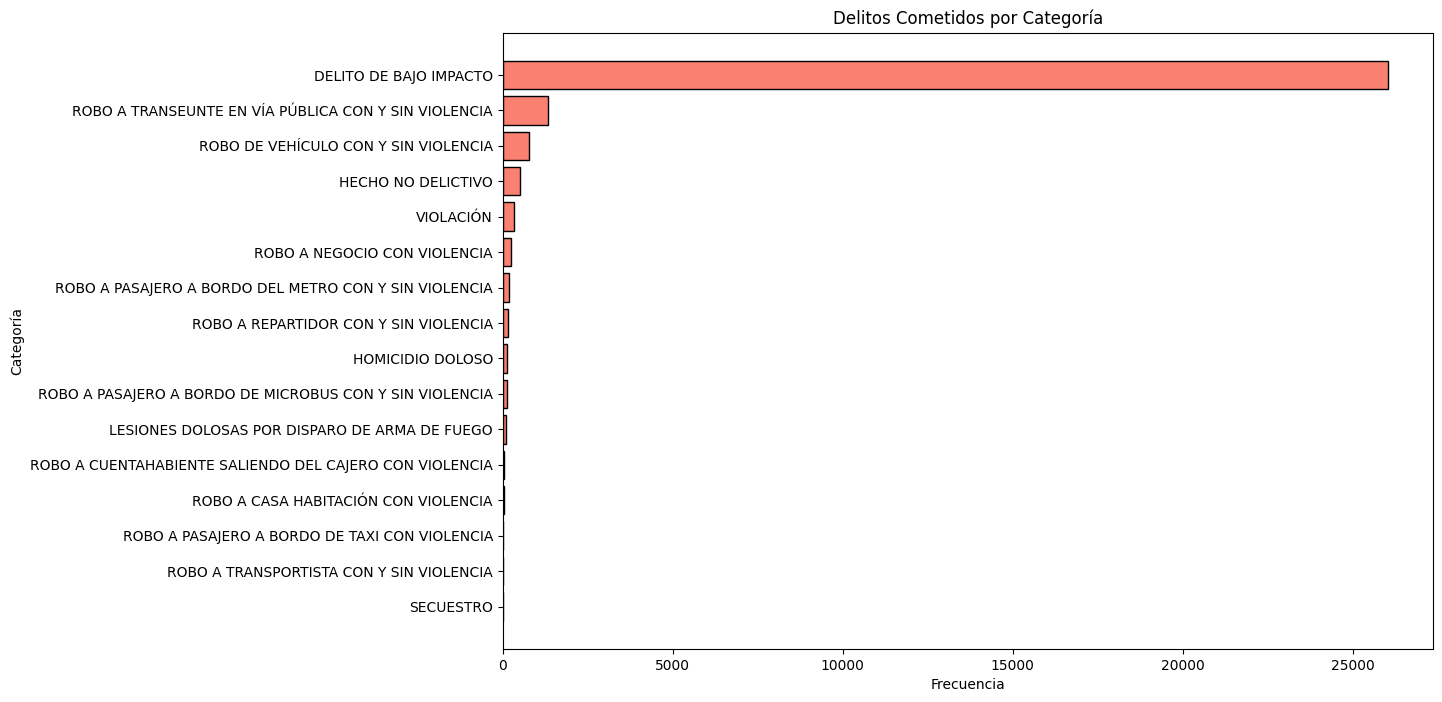

In [35]:
# Gráfico de delitos por categoría

plt.figure(figsize=(12, 8)) 
plt.barh(delitos_categoria_df['categoria'], delitos_categoria_df['frecuencia'], color = 'salmon', edgecolor = 'black')
plt.xlabel('Frecuencia')
plt.ylabel('Categoría')
plt.title('Delitos Cometidos por Categoría')
plt.gca().invert_yaxis()
plt.show()

**5 Colonias con más Delitos**

In [36]:
colonias_delitos = df['colonia_hecho'].value_counts().head(5)
print(colonias_delitos)

colonia_hecho
CENTRO               704
DOCTORES             442
ROMA NORTE           347
DEL VALLE CENTRO     326
AGRÍCOLA ORIENTAL    286
Name: count, dtype: int64


**Horario en el cuál se registraron más delitos**

In [47]:

delito_hora = df['hora_inicio'].value_counts()
hora_max = delito_hora.idxmax()
print('La hora donde se registraron más delitos es:', hora_max)


La hora donde se registraron más delitos es: 13:28:00


**Las 3 Alcaldias donde se registraron menos delitos**

In [49]:
delito_alcaldia = df['alcaldia_hecho'].value_counts()
alcaldias_menos = delito_alcaldia.tail(3)
print(alcaldias_menos)

alcaldia_hecho
CUAJIMALPA DE MORELOS    527
MILPA ALTA               328
FUERA DE CDMX            321
Name: count, dtype: int64
